<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2024-2025/Practiques/Pr1_Integracio_(solucions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pràctica 1: Integració amb el mètode de simulació Monte Carlo (Solucions)**

<hr>

# **Context**

Anem a utilitzar el mètode d'integració per Monte Carlo per calcular el valor de $\pi$. Aquest mètode utilitza la aleatorietat per aproximar solucions numèriques a problemes matemàtics. En el nostre cas, volem calcular l'àrea d'un cercle de radi 1.

Per començar, definim un quadrat en el qual cap aquest cercle de radi 1. Aquest quadrat tindrà dimensions $2x2$ i estarà centrat en l'origen del pla cartesià.

Ara bé, si generem nombres aleatoris uniformement distribuïts en aquest pla (és a dir, cada punt té la mateixa probabilitat d'aparèixer en qualsevol lloc dins del quadrat), podem determinar quants d'aquests punts cauen dins el cercle de radi 1.

Per verificar si un punt $(x, y)$ està dins del cercle, utilitzem la condició matemàtica que la distància a l'origen $(0,0)$ ha de ser menor o igual a 1. És a dir, si la suma dels quadrats de les coordenades $(x^2 + y^2)$ és menor o igual a 1, llavors el punt està dins el cercle.

Portarem un registre de dues quantitats importants:

*   El nombre total de punts que generem ($N_{total}$).
*   El nombre de punts que cauen dins el cercle ($N_{dins}$).

Si dividim el nombre de punts dins del cercle ($N_{dins}$) pel nombre total de punts ($N_{total}$), hauríem d'obtenir una fracció que és una aproximació de la raó de les àrees del cercle al quadrat. Com que l'àrea del cercle és $\pi$ i l'àrea del quadrat és 4, aquesta fracció hauria de ser aproximadament igual a $\pi$/4. Per tant, per estimar el valor de $\pi$, multiplicarem aquesta fracció per 4:

$$
\pi≈4 \frac{N_{in}}{N_{total}}
$$

Un cop hem generat una quantitat suficient de punts, aquesta aproximació hauria de convergir cap al valor real de 𝜋.

### <font color='orange'>**> Python #1**</font>

Anem a dibuixar el cercle i l'àrea on llançarem els punts aleatoris:

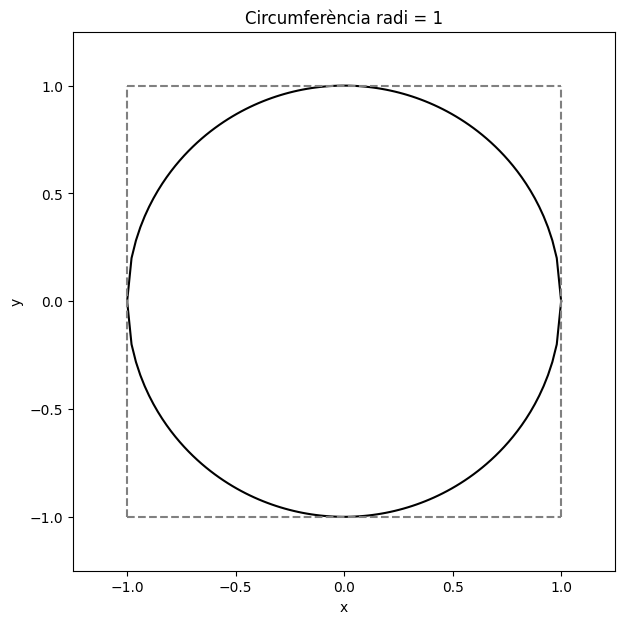

In [ ]:
# El teu codi

import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sqrt(1-x*x)
x = np.linspace(-1, 1, 100) # Array de punts en x per avaluar f(x)

plt.figure(figsize=(7, 7))
plt.plot(x,f(x),'k-')
plt.plot(x,-1*f(x),'k-')
plt.hlines(1,-1,1,colors='grey',linestyle="--")
plt.hlines(-1,-1,1,colors='grey',linestyle="--")
plt.vlines(1,-1,1,colors='grey',linestyle="--")
plt.vlines(-1,-1,1,colors='grey',linestyle="--")
plt.title("Circumferència radi = 1")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.show()

### <font color='orange'>**> Python #2**</font>

Genera 1000 punts aleatoris dins de l'àrea d'integració, i pinta en verd els que cauen a dins del cercle, i en vermell els que han caigut a fora.

Imprimeix per pantalla la teva estimació del número $\pi$. Varía molt aquest càlcul si re-executes aquesta cel·la?

pi =  3.196


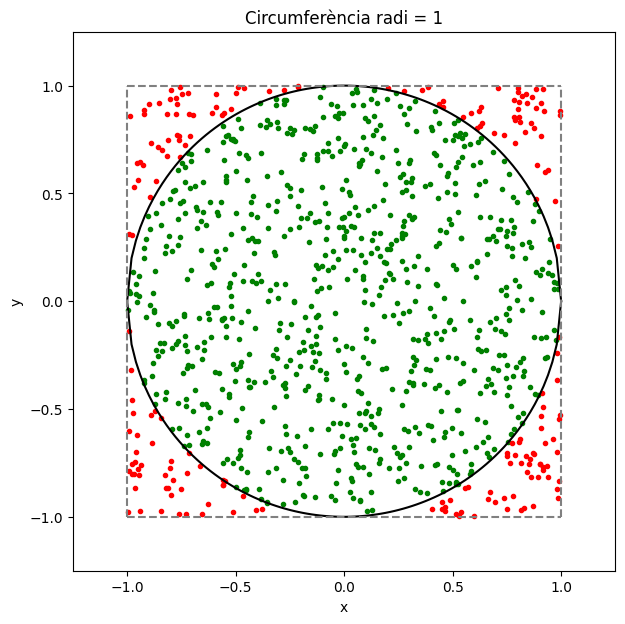

In [ ]:
# Primera possibilitat: fer un bucle i evaluar la condició

N = 1000 # Número de puntos (x,y) que usaremos para calcular el número pi

x_tries = np.random.uniform(-1,1,N)
y_tries = np.random.uniform(-1,1,N)

x_valid = [] # Definim llistes buides per posar els parells de punts (x,y) vàlids [queden dins], o novàlids [queden fora del cercle]
y_valid = []
x_novalid = []
y_novalid = []

for i in range(N):
  if np.abs(y_tries[i]) <= f(x_tries[i]):
    x_valid.append(x_tries[i])
    y_valid.append(y_tries[i])
  else:
    x_novalid.append(x_tries[i])
    y_novalid.append(y_tries[i])

plt.figure(figsize=(7, 7))

plt.plot(x_valid,y_valid,'g.')
plt.plot(x_novalid,y_novalid,'r.')
plt.plot(x,f(x),'k-',)
plt.plot(x,-1*f(x),'k-')
plt.hlines(1,-1,1,colors='grey',linestyle="--")
plt.hlines(-1,-1,1,colors='grey',linestyle="--")
plt.vlines(1,-1,1,colors='grey',linestyle="--")
plt.vlines(-1,-1,1,colors='grey',linestyle="--")
plt.title("Circumferència radi = 1")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

print("pi = ",4*len(x_valid)/N)

pi =  3.192


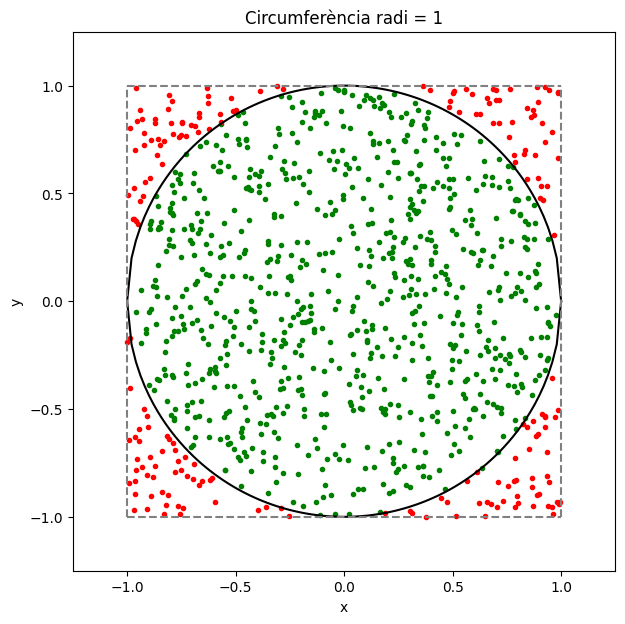

In [ ]:
# Segona possibilitat: utilitzar màscares a una llista

N = 1000 # Número de puntos (x,y) que usaremos para calcular el número pi

x_tries = np.random.uniform(-1,1,N)
y_tries = np.random.uniform(-1,1,N)

x_valid = x_tries[np.abs(y_tries) <= f(x_tries)] # La condició de dins els [] retorna una llista de True o False, i actúa com una 'màscara'. Així ens quedem els elements de la llista que donen True a aquesta condició
y_valid = y_tries[np.abs(y_tries) <= f(x_tries)]
x_novalid = x_tries[np.abs(y_tries) > f(x_tries)]
y_novalid = y_tries[np.abs(y_tries) > f(x_tries)]

plt.figure(figsize=(7, 7))

plt.plot(x_valid,y_valid,'g.')
plt.plot(x_novalid,y_novalid,'r.')
plt.plot(x,f(x),'k-',)
plt.plot(x,-1*f(x),'k-')
plt.hlines(1,-1,1,colors='grey',linestyle="--")
plt.hlines(-1,-1,1,colors='grey',linestyle="--")
plt.vlines(1,-1,1,colors='grey',linestyle="--")
plt.vlines(-1,-1,1,colors='grey',linestyle="--")
plt.title("Circumferència radi = 1")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

print("pi = ",4*len(x_valid)/N)

### <font color='orange'>**> Python #3**</font>

Quan només tenim un petit nombre de punts, l'estimació de $\pi$ no és molt precisa, però quan tenim centenars de milers de punts, ens acostem molt més al valor real.

Anem a veure com convergeix la precisió del valor calculat, comparant amb $numpy.pi$, quan augmentem el nombre $N_{total}$ de punts aleatoris.

Estima la precissió en percentatge com:

$$
Prec = 100.*\frac{|\pi - \pi_{estimat}|}{\pi}
$$

i evalua aquesta precissió per N_total=10,100,1000,10000,100000 i 1000000.

Fes dues gràfiques:

*   $\pi_{estimat}$ vs. $N_{total}$ (i mostra una línea horitzontal al valor de $\pi$)
*   *Prec* vs. $N_{total}$ (i mostra dues línees horitzontals pels valors 1% i 0.1%)

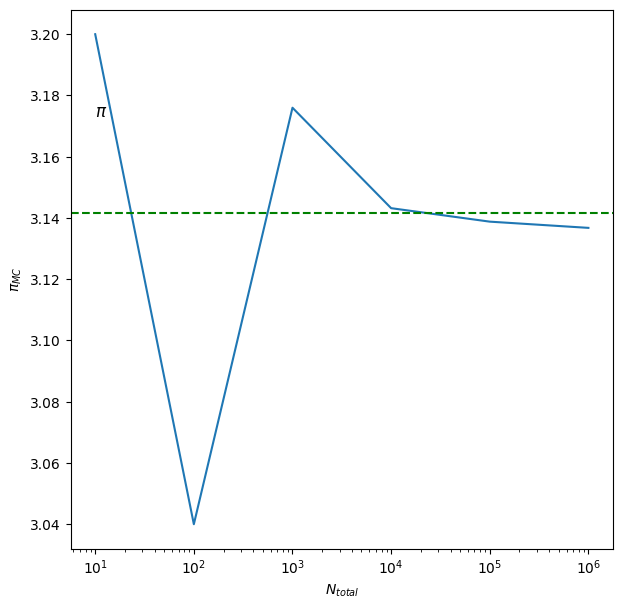

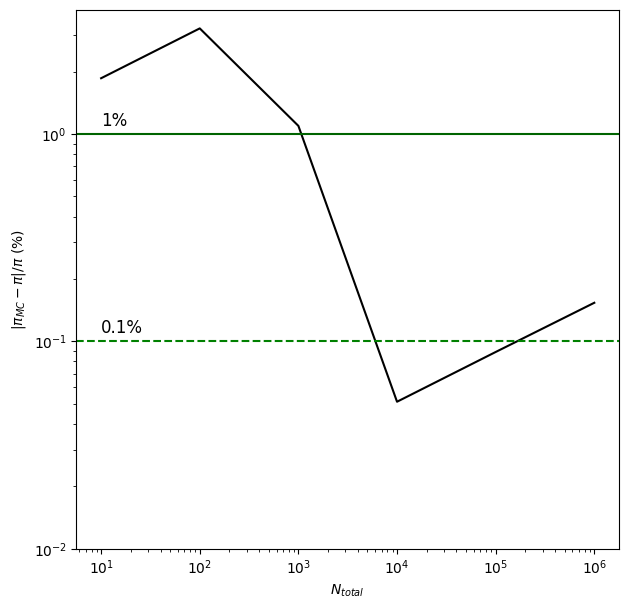

In [ ]:
# Primera opció: definint una funció que ens retorna el número PI si li passem com a argument el número N

def MC_Pi(N):

  x_tries = np.random.uniform(-1,1,N)
  y_tries = np.random.uniform(-1,1,N)
  return 4.*sum(np.abs(y_tries) <= f(x_tries))/N

Nt = []
PiC = []
for a in range(1,7):
  i = np.power(10,a)
  Nt.append(i)
  PiC.append(MC_Pi(i))

plt.figure(figsize=(7, 7))
plt.plot(Nt,PiC)
plt.xlabel("$N_{total}$")
plt.ylabel("$\pi_{MC}$")
plt.xscale('log')
plt.axhline(np.pi, linestyle='--', color='green')
plt.text(Nt[0], 1.01*np.pi, "$\pi$", fontsize=12)
plt.show()

diff = [100.*np.abs(x - np.pi)/np.pi for x in PiC] # Llavors la Prec la podem calcular a partir dels PIs que ha retornat la funció
plt.figure(figsize=(7, 7))
plt.plot(Nt,diff,"k-")
plt.xlabel("$N_{total}$")
plt.ylabel("$|\pi_{MC}-\pi|/\pi$ (%)")
plt.xscale('log')
plt.yscale('log')
plt.axhline(1., linestyle='-', color='darkgreen')
plt.text(Nt[0], 1.1, "1%", fontsize=12)
plt.axhline(0.1, linestyle='--', color='green')
plt.text(Nt[0], 0.11, "0.1%", fontsize=12)
plt.ylim(0.01)
plt.show()

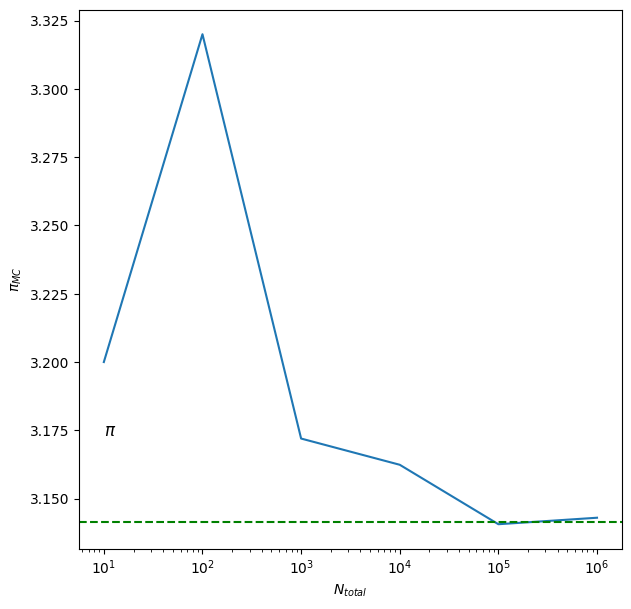

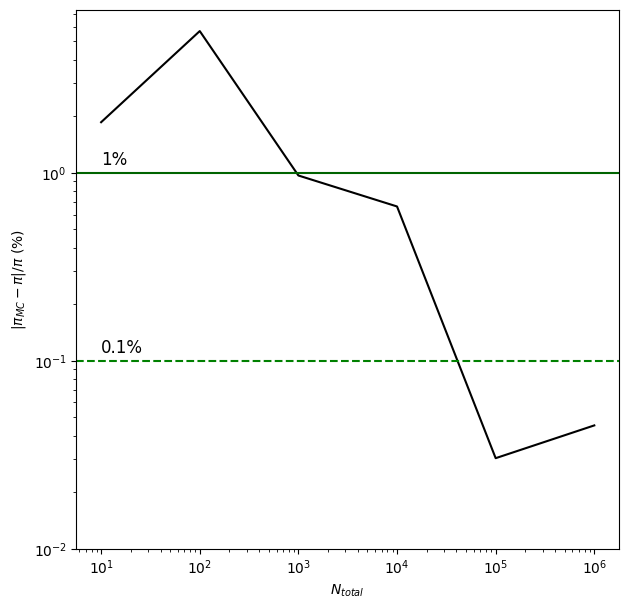

In [ ]:
# Segona opció: definint una funció que ens retorna el número PI i la Precissió si li passem com a argument el número N

def MC_Pi(N):

  x_tries = np.random.uniform(-1,1,N)
  y_tries = np.random.uniform(-1,1,N)
  pi_c = 4.*sum(np.abs(y_tries) <= f(x_tries))/N
  return pi_c, 100.*np.abs(pi_c - np.pi)/np.pi

Nt = []
PiC = []
diff = []

for a in range(1,7):
  i = np.power(10,a)
  Nt.append(i)
  m=MC_Pi(i)
  PiC.append(m[0]) # Ara la llista 0 és la llista de PIs calculats
  diff.append(m[1]) # Ara la llista 1 és la llista de Prec calculats

plt.figure(figsize=(7, 7))
plt.plot(Nt,PiC)
plt.xlabel("$N_{total}$")
plt.ylabel("$\pi_{MC}$")
plt.xscale('log')
plt.axhline(np.pi, linestyle='--', color='green')
plt.text(Nt[0], 1.01*np.pi, "$\pi$", fontsize=12)
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(Nt,diff,"k-")
plt.xlabel("$N_{total}$")
plt.ylabel("$|\pi_{MC}-\pi|/\pi$ (%)")
plt.xscale('log')
plt.yscale('log')
plt.axhline(1., linestyle='-', color='darkgreen')
plt.text(Nt[0], 1.1, "1%", fontsize=12)
plt.axhline(0.1, linestyle='--', color='green')
plt.text(Nt[0], 0.11, "0.1%", fontsize=12)
plt.ylim(0.01)
plt.show()

### <font color='orange'>**> Python #4 (opcional)**</font>

Si re-executes la cel·la anterior, veuràs que el valor de la precissió per $N_{total}$ petits fluctua molt! Hauriem d'executar moltes vegades, i per a cada valor de $N_{total}$ calcular la mitja del teu càlcul de $\pi$.

Fes una gràfica de *Prec* vs. $N_{total}$, on per a cada valor de $N_{total}$ mostres la mitja (i error en la mitja) d'haver executat 10 simulacions per a cadascun dels valors de $N_{total}$.

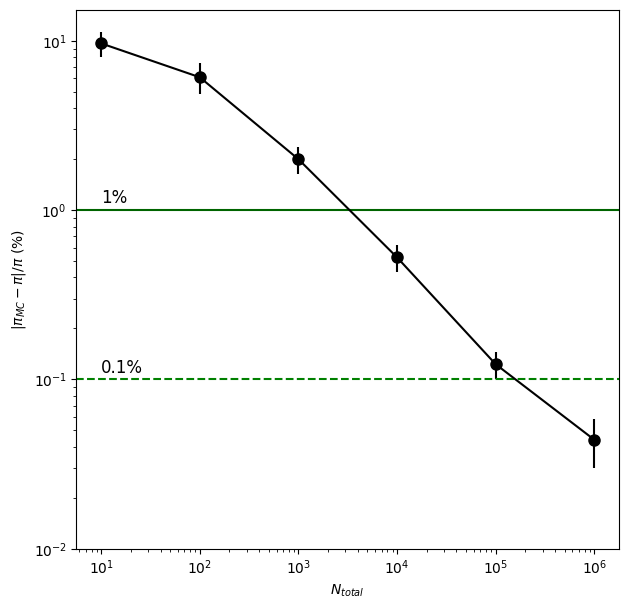

In [ ]:
N_sims = 10

Nt = []
PiC = []
PiC_e = []

for a in range(1,7):
  i = np.power(10,a)
  Nt.append(i)
  PiC_temp = []
  for j in range(1,N_sims+1):
    PiC_temp.append(100.*np.abs(MC_Pi(i)- np.pi)/np.pi)
  PiC.append(np.mean(PiC_temp))
  PiC_e.append(np.std(PiC_temp)/np.sqrt(len(PiC_temp)))

plt.figure(figsize=(7, 7))
plt.errorbar(Nt,PiC,yerr=PiC_e, xerr=None, marker='o', markersize=8, c='k')
plt.xlabel("$N_{total}$")
plt.ylabel("$|\pi_{MC}-\pi|/\pi$ (%)")
plt.xscale('log')
plt.yscale('log')
plt.axhline(1., linestyle='-', color='darkgreen')
plt.text(Nt[0], 1.1, "1%", fontsize=12)
plt.axhline(0.1, linestyle='--', color='green')
plt.text(Nt[0], 0.11, "0.1%", fontsize=12)
plt.ylim(0.01)
plt.show()

### <font color='green'>**> ENTREGA**</font>

Anem a calcular amb aquest mètode d'integració Monte Carlos l'àrea compresa entre el semi-cercle de radi $\pi/2$ centrat a (y=0,x=$\pi/2$), per y>0, i la funció $sin(x)$, a l'interval $[0,pi]$. És a dir, aquesta àrea:

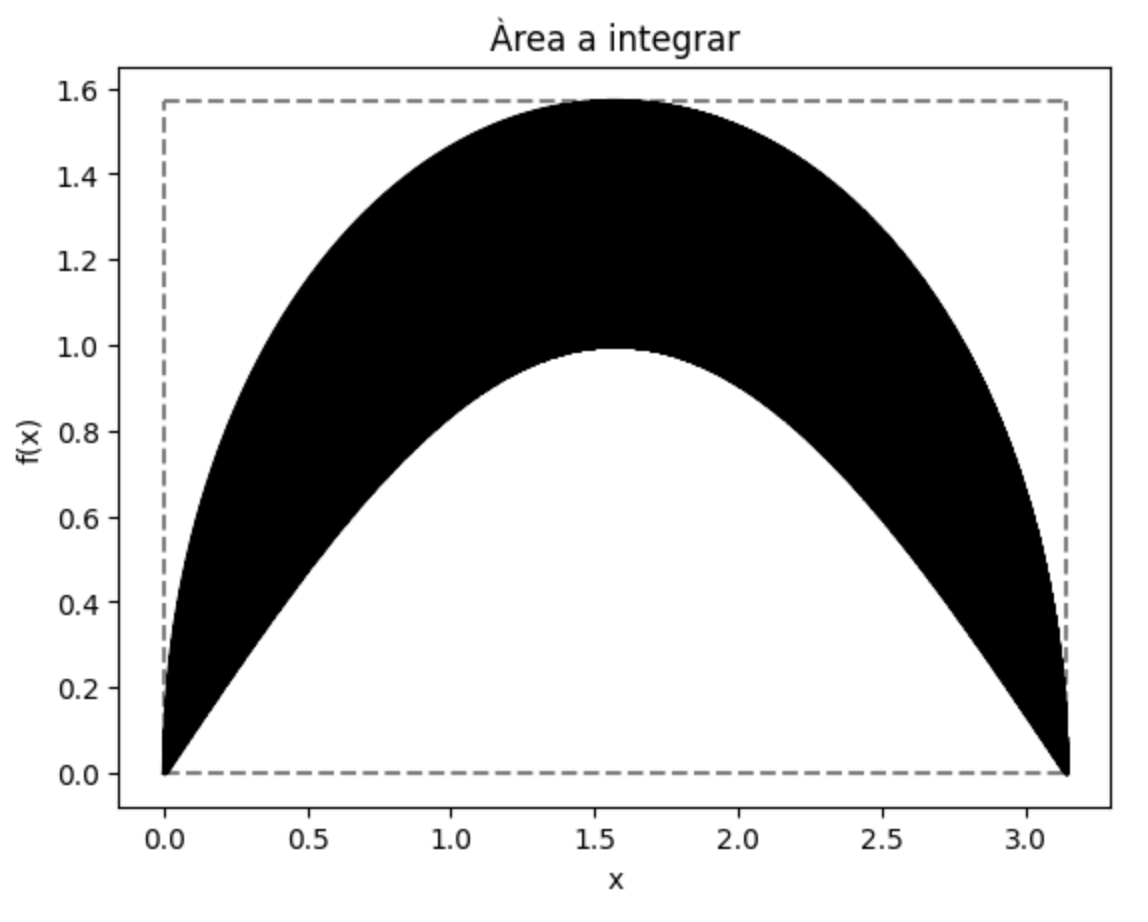

### <font color='green'>**> Entrega #1**</font>

Dibuixa les dues funcions i l'àrea d'integració. **[3 punts]**

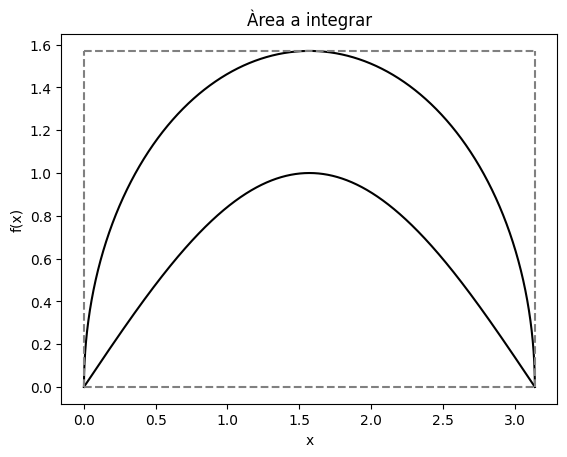

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = lambda x: np.sin(x) # sin(x)
fc = lambda x: np.sqrt((np.pi**2)/4.-(x-np.pi/2)**2) # semi-cercle
x = np.linspace(0.0, np.pi, 10000) # Array de punts per a evaluar les funcions

plt.plot(x,fs(x),'-',color='k')
plt.plot(x,fc(x),'-',color='k')
plt.title("Àrea a integrar")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.hlines(0,0,np.pi,colors='grey',linestyle="--")
plt.hlines(np.pi/2,0,np.pi,colors='grey',linestyle="--")
plt.vlines(0,0,np.pi/2,colors='grey',linestyle="--")
plt.vlines(np.pi,0,np.pi/2,colors='grey',linestyle="--")
plt.show()


### <font color='green'>**> Entrega #2**</font>

Genera 1000 punts aleatoris dins de l'àrea d'integració, i pinta en verd els que cauen a dins del cercle, i en vermell els que han caigut a fora.

Imprimeix per pantalla la teva estimació de l'àrea. **[3 punts]**


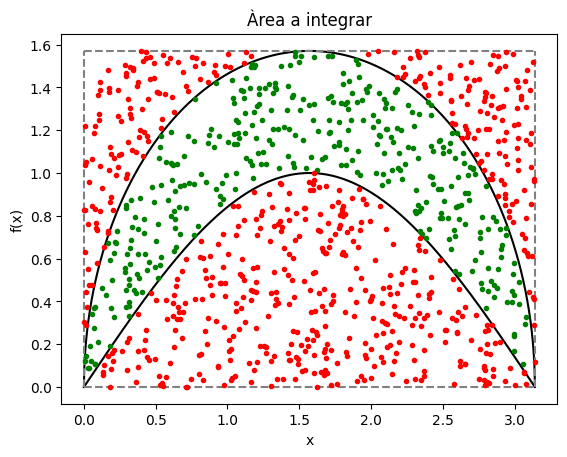

Àrea =  1.7962680009982632


In [ ]:
# Primera opció: fent un bucle i aplicant la condició

fs = lambda x: np.sin(x) # sin(x)
fc = lambda x: np.sqrt((np.pi**2)/4.-(x-np.pi/2)**2) # semi-cercle
x = np.linspace(0.0, np.pi, 10000) # Array de punts per a evaluar les funcions

N = 1000 # Número de puntos (x,y) que usaremos para calcular el número pi

x_tries = np.random.uniform(0,np.pi,N)
y_tries = np.random.uniform(0,np.pi/2,N)

x_valid = []
y_valid = []

x_novalid = []
y_novalid = []

for i in range(0,N):
  if (y_tries[i] <= fc(x_tries[i])) and (y_tries[i] >= fs(x_tries[i])):
    x_valid.append(x_tries[i])
    y_valid.append(y_tries[i])
  else:
    x_novalid.append(x_tries[i])
    y_novalid.append(y_tries[i])

plt.plot(x,fs(x),'-',color='k')
plt.plot(x,fc(x),'-',color='k')
plt.title("Àrea a integrar")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.hlines(0,0,np.pi,colors='grey',linestyle="--")
plt.hlines(np.pi/2,0,np.pi,colors='grey',linestyle="--")
plt.vlines(0,0,np.pi/2,colors='grey',linestyle="--")
plt.vlines(np.pi,0,np.pi/2,colors='grey',linestyle="--")

plt.plot(x_valid,y_valid,'g.')
plt.plot(x_novalid,y_novalid,'r.')

plt.show()

print("Àrea = ",0.5*np.pi**2.*len(x_valid)/N)


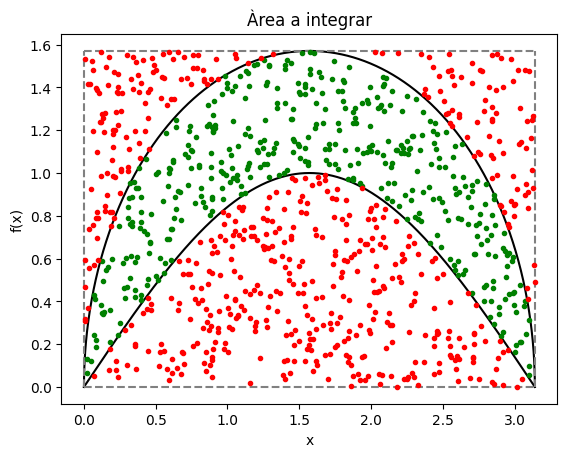

Àrea =  2.0676821220282204


In [ ]:
# Segona opció: aplicant les dues condicions amb una màscara

fs = lambda x: np.sin(x) # sin(x)
fc = lambda x: np.sqrt((np.pi**2)/4.-(x-np.pi/2)**2) # semi-cercle
x = np.linspace(0.0, np.pi, 10000) # Array de punts per a evaluar les funcions

N = 1000 # Número de puntos (x,y) que usaremos para calcular el número pi

x_tries = np.random.uniform(0,np.pi,N)
y_tries = np.random.uniform(0,np.pi/2,N)

x_valid = x_tries[(y_tries <= fc(x_tries)) & (y_tries >= fs(x_tries))] # les condicions van entre parèntesi i es fa servir & com a AND
y_valid = y_tries[(y_tries <= fc(x_tries)) & (y_tries >= fs(x_tries))]

x_novalid = x_tries[(y_tries > fc(x_tries)) | (y_tries < fs(x_tries))] # les condicions van entre parèntesi i es fa servir | com a OR
y_novalid = y_tries[(y_tries > fc(x_tries)) | (y_tries < fs(x_tries))]

plt.plot(x,fs(x),'-',color='k')
plt.plot(x,fc(x),'-',color='k')
plt.title("Àrea a integrar")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.hlines(0,0,np.pi,colors='grey',linestyle="--")
plt.hlines(np.pi/2,0,np.pi,colors='grey',linestyle="--")
plt.vlines(0,0,np.pi/2,colors='grey',linestyle="--")
plt.vlines(np.pi,0,np.pi/2,colors='grey',linestyle="--")

plt.plot(x_valid,y_valid,'g.')
plt.plot(x_novalid,y_novalid,'r.')

plt.show()

print("Àrea = ",0.5*np.pi**2.*len(x_valid)/N)


### <font color='green'>**> Entrega #3**</font>

De fet, aquesta àrea la podem calcular de forma analítica. No és més que la integral del semi-cercle menys la integral de "sin(x)":

$$
A_{analítica} = \frac{\pi^3}{8}-2 \sim 1.876
$$

Augmenta el nombre $N_{total}$ de punts aleatoris i estima la precissió en percentatge de la teva mesura com:

$$
Prec = 100.*\frac{|A_{analítica} - A_{mc}|}{A_{Analítica}}
$$

i evalua aquesta precissió per N_total=10,100,1000,10000,100000 i 1000000.

Fes la gràfica:

*   *Prec* vs. $N_{total}$ (i mostra dues línees horitzontals pels valors 1% i 0.1%)

**[4 punts]**

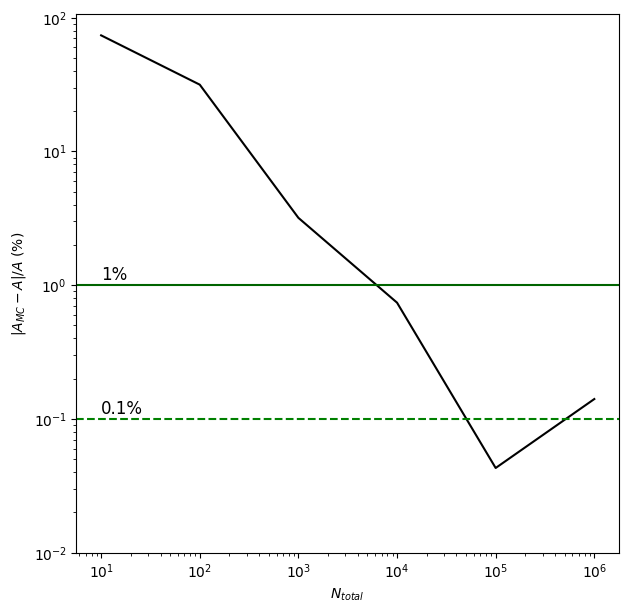

In [ ]:
def IntMC(N):

  A = (1./8.)*np.pi**3-2.

  x_tries = np.random.uniform(0,np.pi,N)
  y_tries = np.random.uniform(0,np.pi/2,N)
  count = 0

  for i in range(0,N):
    if (y_tries[i] <= fc(x_tries[i])) and (y_tries[i] >= fs(x_tries[i])):
      count+=1

  return 100.*np.abs(A - (0.5*np.pi**2.*count/N))/A

Nt = []
PiC = []
for a in range(1,7):
  i = np.power(10,a)
  Nt.append(i)
  PiC.append(IntMC(i))

plt.figure(figsize=(7, 7))
plt.plot(Nt,PiC,"k-")
plt.xlabel("$N_{total}$")
plt.ylabel("$|A_{MC}-A|/A$ (%)")
plt.xscale('log')
plt.yscale('log')
plt.axhline(1., linestyle='-', color='darkgreen')
plt.text(Nt[0], 1.1, "1%", fontsize=12)
plt.axhline(0.1, linestyle='--', color='green')
plt.text(Nt[0], 0.11, "0.1%", fontsize=12)
plt.ylim(0.01)
plt.show()